# Exploratory Data Analysis (EDA) for Classification (discrete outcome variable)

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'DATA/OSA_DB_cleaned.xlsx'
df = pd.read_excel(file_path)

# Drop the 'Patient' column
df = df.drop(columns=['Patient'])

# Convert 'Gender' to a categorical variable
df['Gender'] = df['Gender'].astype('category')

df.head()

,Gender,AHI,Weight,Age,Height,Cervical,BMI
0,1,71.0,82.000000,39.0,168.000000,40.617735,29.053288
1,1,29.6,119.000000,56.0,174.000000,48.000000,39.305060
2,1,56.0,87.797037,46.0,171.399408,43.000000,29.885548
3,1,19.7,78.000000,39.0,168.000000,42.000000,27.636054
4,1,9.0,80.000000,32.0,173.000000,40.000000,26.729927


## Categorize outcome variable (AHI) in 4 distinct classes 

Number of patients with no OSA (AHI <= 5): 131
Number of patients with mild OSA (5 < AHI <= 15): 200
Number of patients with moderate OSA (15 < AHI <= 30): 149
Number of patients with severe OSA (AHI > 30): 169


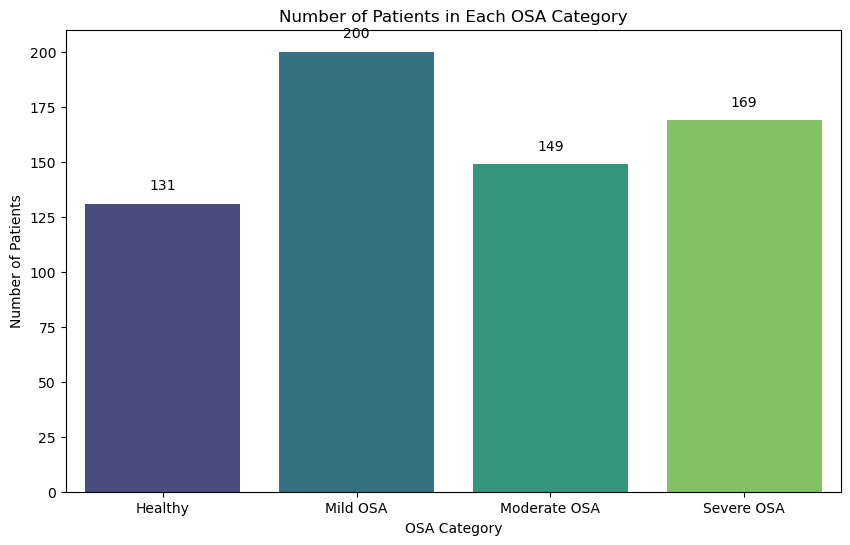

In [53]:
# Define the conditions for each OSA category
severe_osa = df[df['AHI'] >= 30]
moderate_osa = df[(df['AHI'] >= 15) & (df['AHI'] < 30)]
mild_osa = df[(df['AHI'] >= 5) & (df['AHI'] < 15)]
no_osa = df[df['AHI'] < 5]

# Calculate the number of patients in each category
num_severe_osa = severe_osa.shape[0]
num_moderate_osa = moderate_osa.shape[0]
num_mild_osa = mild_osa.shape[0]
num_no_osa = no_osa.shape[0]
# Print the results
print(f"Number of patients with no OSA (AHI <= 5): {num_no_osa}")
print(f"Number of patients with mild OSA (5 < AHI <= 15): {num_mild_osa}")
print(f"Number of patients with moderate OSA (15 < AHI <= 30): {num_moderate_osa}")
print(f"Number of patients with severe OSA (AHI > 30): {num_severe_osa}")

# Plot the number of patients in each OSA category
categories = ['Healthy', 'Mild OSA', 'Moderate OSA', 'Severe OSA']
counts = [num_no_osa, num_mild_osa, num_moderate_osa, num_severe_osa]

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts, palette='viridis')
plt.title('Number of Patients in Each OSA Category')
plt.xlabel('OSA Category')
plt.ylabel('Number of Patients')

# Annotate the bars with the absolute values
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()


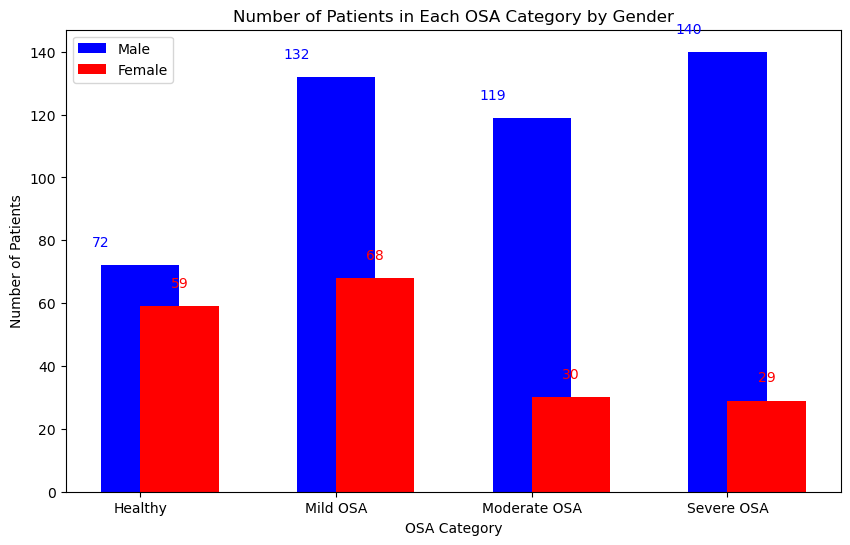

In [54]:
# Plot the number of patients in each OSA category by gender
categories = ['Healthy', 'Mild OSA', 'Moderate OSA', 'Severe OSA']
counts_male = [no_osa[no_osa['Gender'] == 1].shape[0], mild_osa[mild_osa['Gender'] == 1].shape[0], moderate_osa[moderate_osa['Gender'] == 1].shape[0], severe_osa[severe_osa['Gender'] == 1].shape[0]]
counts_female = [no_osa[no_osa['Gender'] == 0].shape[0], mild_osa[mild_osa['Gender'] == 0].shape[0], moderate_osa[moderate_osa['Gender'] == 0].shape[0], severe_osa[severe_osa['Gender'] == 0].shape[0]]

x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, counts_male, width=0.4, label='Male', align='center', color='blue')
plt.bar(x, counts_female, width=0.4, label='Female', align='edge', color='red')
plt.title('Number of Patients in Each OSA Category by Gender')
plt.xlabel('OSA Category')
plt.ylabel('Number of Patients')
plt.xticks(x, categories)
plt.legend()

# Annotate the bars with the absolute values
for i, (count_male, count_female) in enumerate(zip(counts_male, counts_female)):
    plt.text(i - 0.2, count_male + 5, str(count_male), ha='center', va='bottom', color='blue')
    plt.text(i + 0.2, count_female + 5, str(count_female), ha='center', va='bottom', color='red')

plt.show()

## Categorize outcome variable (AHI) in 2 distinct classes 

In [67]:
# Add the OSA column with the specified categories
df['OSA'] = df['AHI'].apply(lambda x: 'Healthy' if x < 5 else ('Severe' if x >= 30 else None))

# Remove rows with AHI values larger than 5 and less or equal to 30
df_class = df.dropna(subset=['OSA'])

# Drop the 'Weight', 'Height', and 'AHI' columns
df_class = df_class.drop(columns=['AHI'])

df_class.head()

# output_file_path = 'DATA/OSA_DB_class.xlsx'
# df_class.to_excel(output_file_path, index=False)

,Gender,Weight,Age,Height,Cervical,BMI,OSA
0,1,82.000000,39.0,168.000000,40.617735,29.053288,Severe
2,1,87.797037,46.0,171.399408,43.000000,29.885548,Severe
5,1,109.000000,32.0,190.000000,42.000000,30.193906,Healthy
6,1,86.000000,39.0,169.000000,42.000000,30.110991,Severe
7,1,145.000000,47.0,172.000000,44.000000,49.012980,Severe


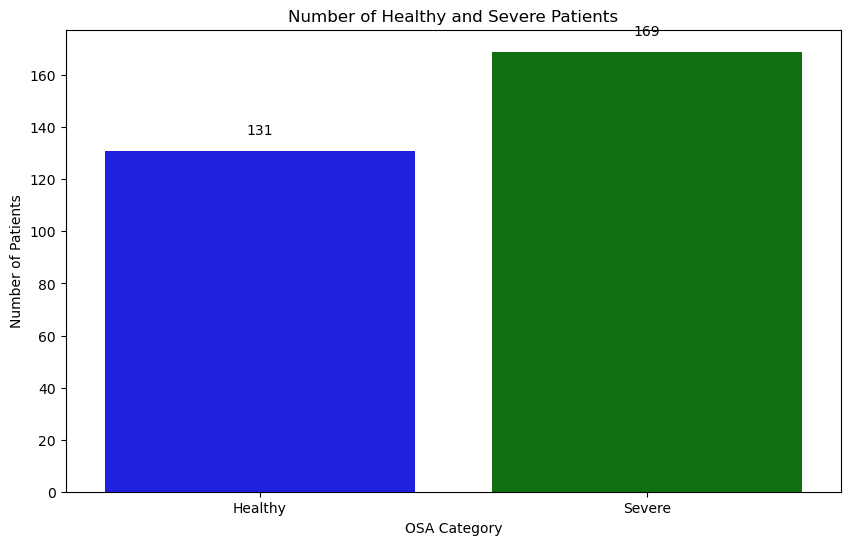

In [68]:
# Separate the counts for healthy and severe cases
osa_counts = df_class['OSA'].value_counts()
healthy_counts = osa_counts['Healthy']
severe_counts = osa_counts['Severe']

# Plot the number of healthy and severe patients
plt.figure(figsize=(10, 6))
sns.barplot(x=['Healthy', 'Severe'], y=[healthy_counts, severe_counts], palette=['blue', 'green'])
plt.title('Number of Healthy and Severe Patients')
plt.xlabel('OSA Category')
plt.ylabel('Number of Patients')

# Annotate the bars with the absolute values
plt.text(0, healthy_counts + 5, str(healthy_counts), ha='center', va='bottom')
plt.text(1, severe_counts + 5, str(severe_counts), ha='center', va='bottom')

plt.show()


In [69]:
df_class.groupby('OSA').describe()

Weight                                                          Age  \
         count       mean        std   min   25%   50%    75%    max  count   
OSA                                                                           
Healthy  131.0  80.880848  14.401586  50.0  69.5  81.0   89.5  115.0  131.0   
Severe   169.0  96.442586  20.569450  59.0  82.0  93.0  109.0  162.0  169.0   

                    ...   Cervical          BMI                       \
              mean  ...        75%   max  count       mean       std   
OSA                 ...                                                
Healthy  43.404637  ...  40.808867  50.0  131.0  27.927311  4.580926   
Severe   51.766294  ...  45.000000  53.0  169.0  32.297994  5.978686   

                                                                
               min        25%        50%        75%        max  
OSA                                                             
Healthy  18.590125  24.507010  26.881720  30.461700  43.282548  
Severe   21.357796  28.068918  31.054973  35.511364  52.298554  

[2 rows x 40 columns]

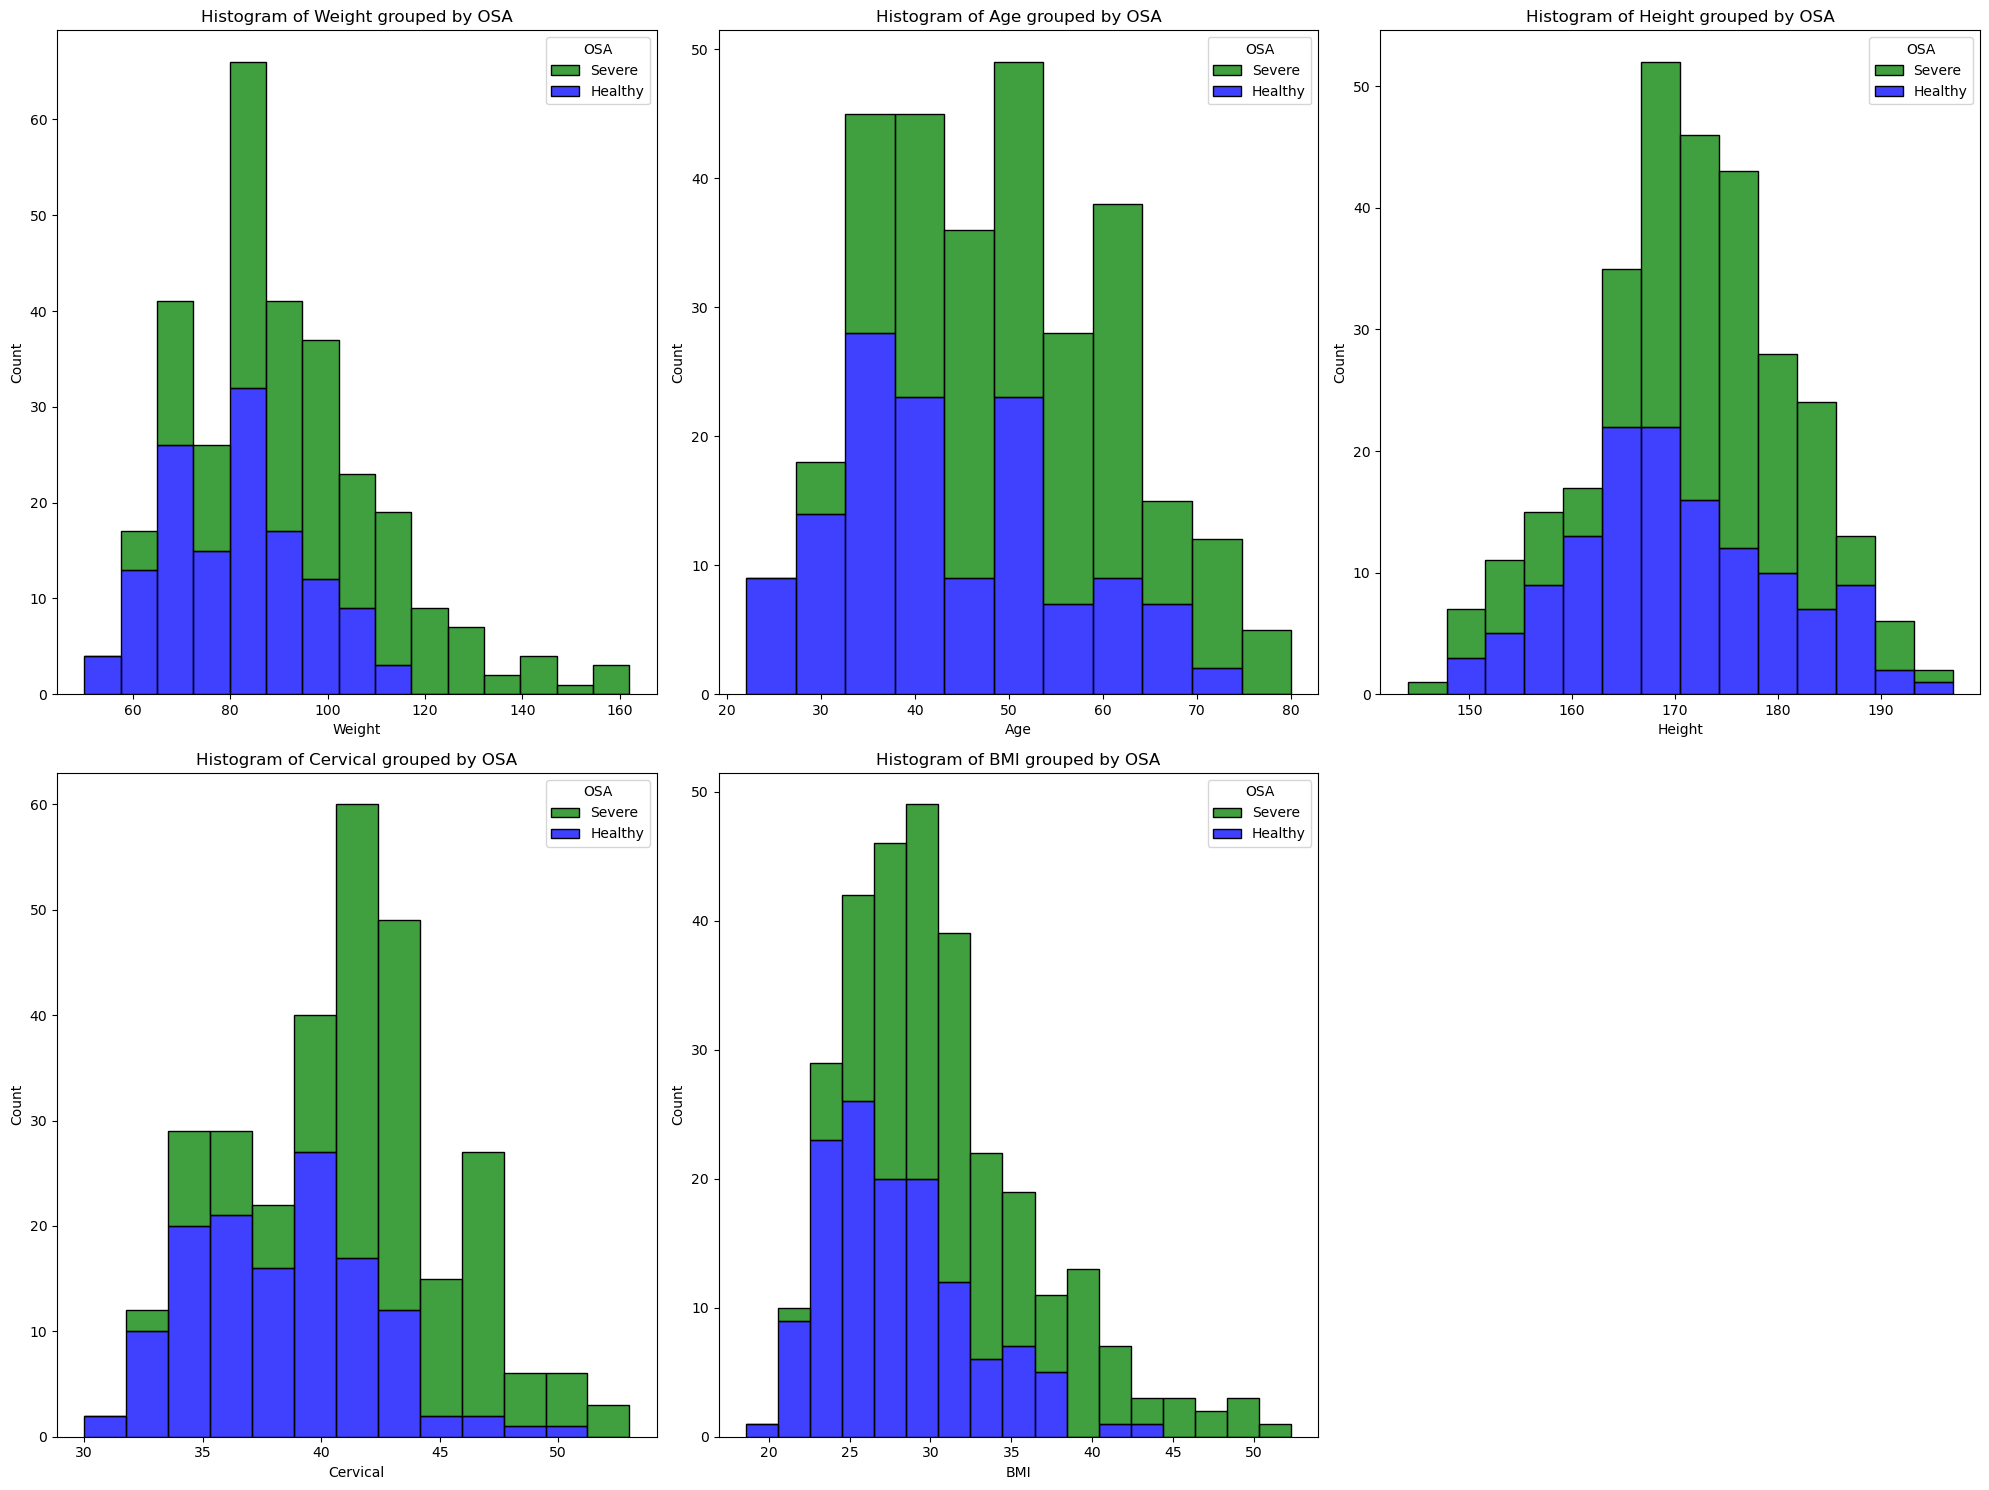

In [70]:
# Plot the histograms of each column in df_class grouped by OSA
columns = df_class.columns.drop(['OSA', 'Gender'])  # Exclude 'OSA' and 'Gender' columns
num_columns = len(columns)

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot((num_columns // 3) + 1, 3, i)
    sns.histplot(data=df_class, x=column, hue='OSA', multiple='stack', palette={'Healthy': 'blue', 'Severe': 'green'})
    plt.title(f'Histogram of {column} grouped by OSA')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [75]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for Age, Cervical, BMI, Weight, and Height
age_stat, age_p_value = mannwhitneyu(df_class[df_class['OSA'] == 'Healthy']['Age'],
                                     df_class[df_class['OSA'] == 'Severe']['Age'])

cervical_stat, cervical_p_value = mannwhitneyu(df_class[df_class['OSA'] == 'Healthy']['Cervical'],
                                               df_class[df_class['OSA'] == 'Severe']['Cervical'])

bmi_stat, bmi_p_value = mannwhitneyu(df_class[df_class['OSA'] == 'Healthy']['BMI'],
                                     df_class[df_class['OSA'] == 'Severe']['BMI'])

weight_stat, weight_p_value = mannwhitneyu(df_class[df_class['OSA'] == 'Healthy']['Weight'],
                                           df_class[df_class['OSA'] == 'Severe']['Weight'])

height_stat, height_p_value = mannwhitneyu(df_class[df_class['OSA'] == 'Healthy']['Height'],
                                           df_class[df_class['OSA'] == 'Severe']['Height'])

# Print the results
print(f"Mann-Whitney U test for Age: U-statistic = {age_stat}, p-value = {age_p_value}")
print(f"Mann-Whitney U test for Cervical: U-statistic = {cervical_stat}, p-value = {cervical_p_value}")
print(f"Mann-Whitney U test for BMI: U-statistic = {bmi_stat}, p-value = {bmi_p_value}")
print(f"Mann-Whitney U test for Weight: U-statistic = {weight_stat}, p-value = {weight_p_value}")
print(f"Mann-Whitney U test for Height: U-statistic = {height_stat}, p-value = {height_p_value}")

Mann-Whitney U test for Age: U-statistic = 6829.0, p-value = 6.282771010233181e-09
Mann-Whitney U test for Cervical: U-statistic = 4763.0, p-value = 1.082570703208692e-17
Mann-Whitney U test for BMI: U-statistic = 6089.5, p-value = 1.1773431146389321e-11
Mann-Whitney U test for Weight: U-statistic = 6110.0, p-value = 1.401727682163606e-11
Mann-Whitney U test for Height: U-statistic = 9116.0, p-value = 0.004362172560294358


In [78]:
# Create a DataFrame to display the results of the Mann-Whitney U test
u_test_results = pd.DataFrame({
    'Variable': ['Age', 'Cervical', 'BMI', 'Weight', 'Height'],
    'U-statistic': [age_stat, cervical_stat, bmi_stat, weight_stat, height_stat],
    'p-value': [age_p_value, cervical_p_value, bmi_p_value, weight_p_value, height_p_value]
})

# Display the DataFrame
u_test_results


,Variable,U-statistic,p-value
0,Age,6829.0,6.282771e-09
1,Cervical,4763.0,1.082571e-17
2,BMI,6089.5,1.177343e-11
3,Weight,6110.0,1.401728e-11
4,Height,9116.0,4.362173e-03


### Dealing with unbalanced dataset

[0]
Original dataset shape: Severe     134
Healthy    106
Name: OSA, dtype: int64
Resampled dataset shape: Severe     134
Healthy    134
Name: OSA, dtype: int64


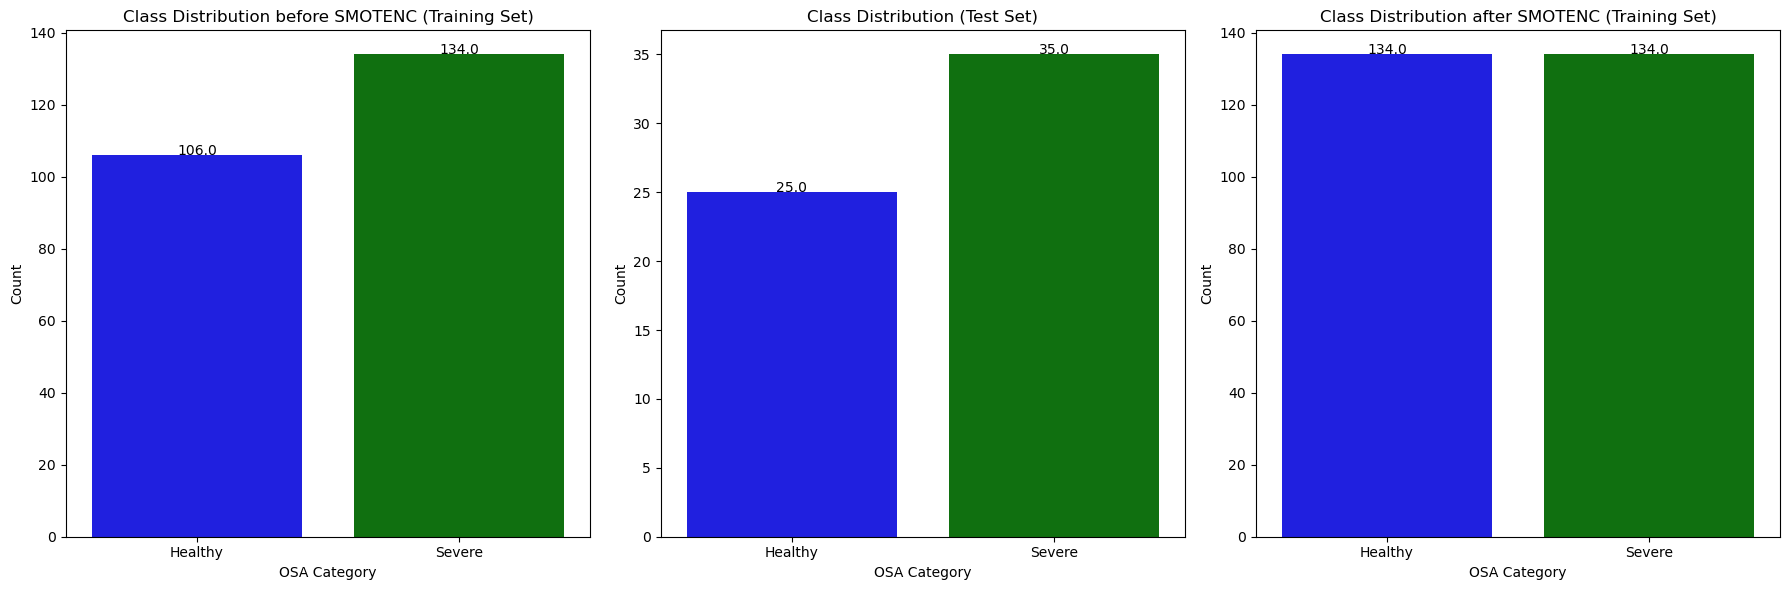

In [81]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'OSA' is the target variable
X = df_class.drop(columns=['OSA'])
y = df_class['OSA']

# Identify the indices of categorical features
categorical_features = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
print(categorical_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# Verify the resampling
print(f'Original dataset shape: {y_train.value_counts()}')
print(f'Resampled dataset shape: {y_resampled.value_counts()}')
# Plot the data distribution before resampling
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], x=y_train, order=['Healthy', 'Severe'], palette={'Healthy': 'blue', 'Severe': 'green'})
axes[0].set_title('Class Distribution before SMOTENC (Training Set)')
axes[0].set_xlabel('OSA Category')
axes[0].set_ylabel('Count')
# Annotate the bars with the absolute values
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

sns.countplot(ax=axes[1], x=y_test, order=['Healthy', 'Severe'], palette={'Healthy': 'blue', 'Severe': 'green'})
axes[1].set_title('Class Distribution (Test Set)')
axes[1].set_xlabel('OSA Category')
axes[1].set_ylabel('Count')
# Annotate the bars with the absolute values
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

sns.countplot(ax=axes[2], x=y_resampled, order=['Healthy', 'Severe'], palette={'Healthy': 'blue', 'Severe': 'green'})
axes[2].set_title('Class Distribution after SMOTENC (Training Set)')
axes[2].set_xlabel('OSA Category')
axes[2].set_ylabel('Count')
# Annotate the bars with the absolute values
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()


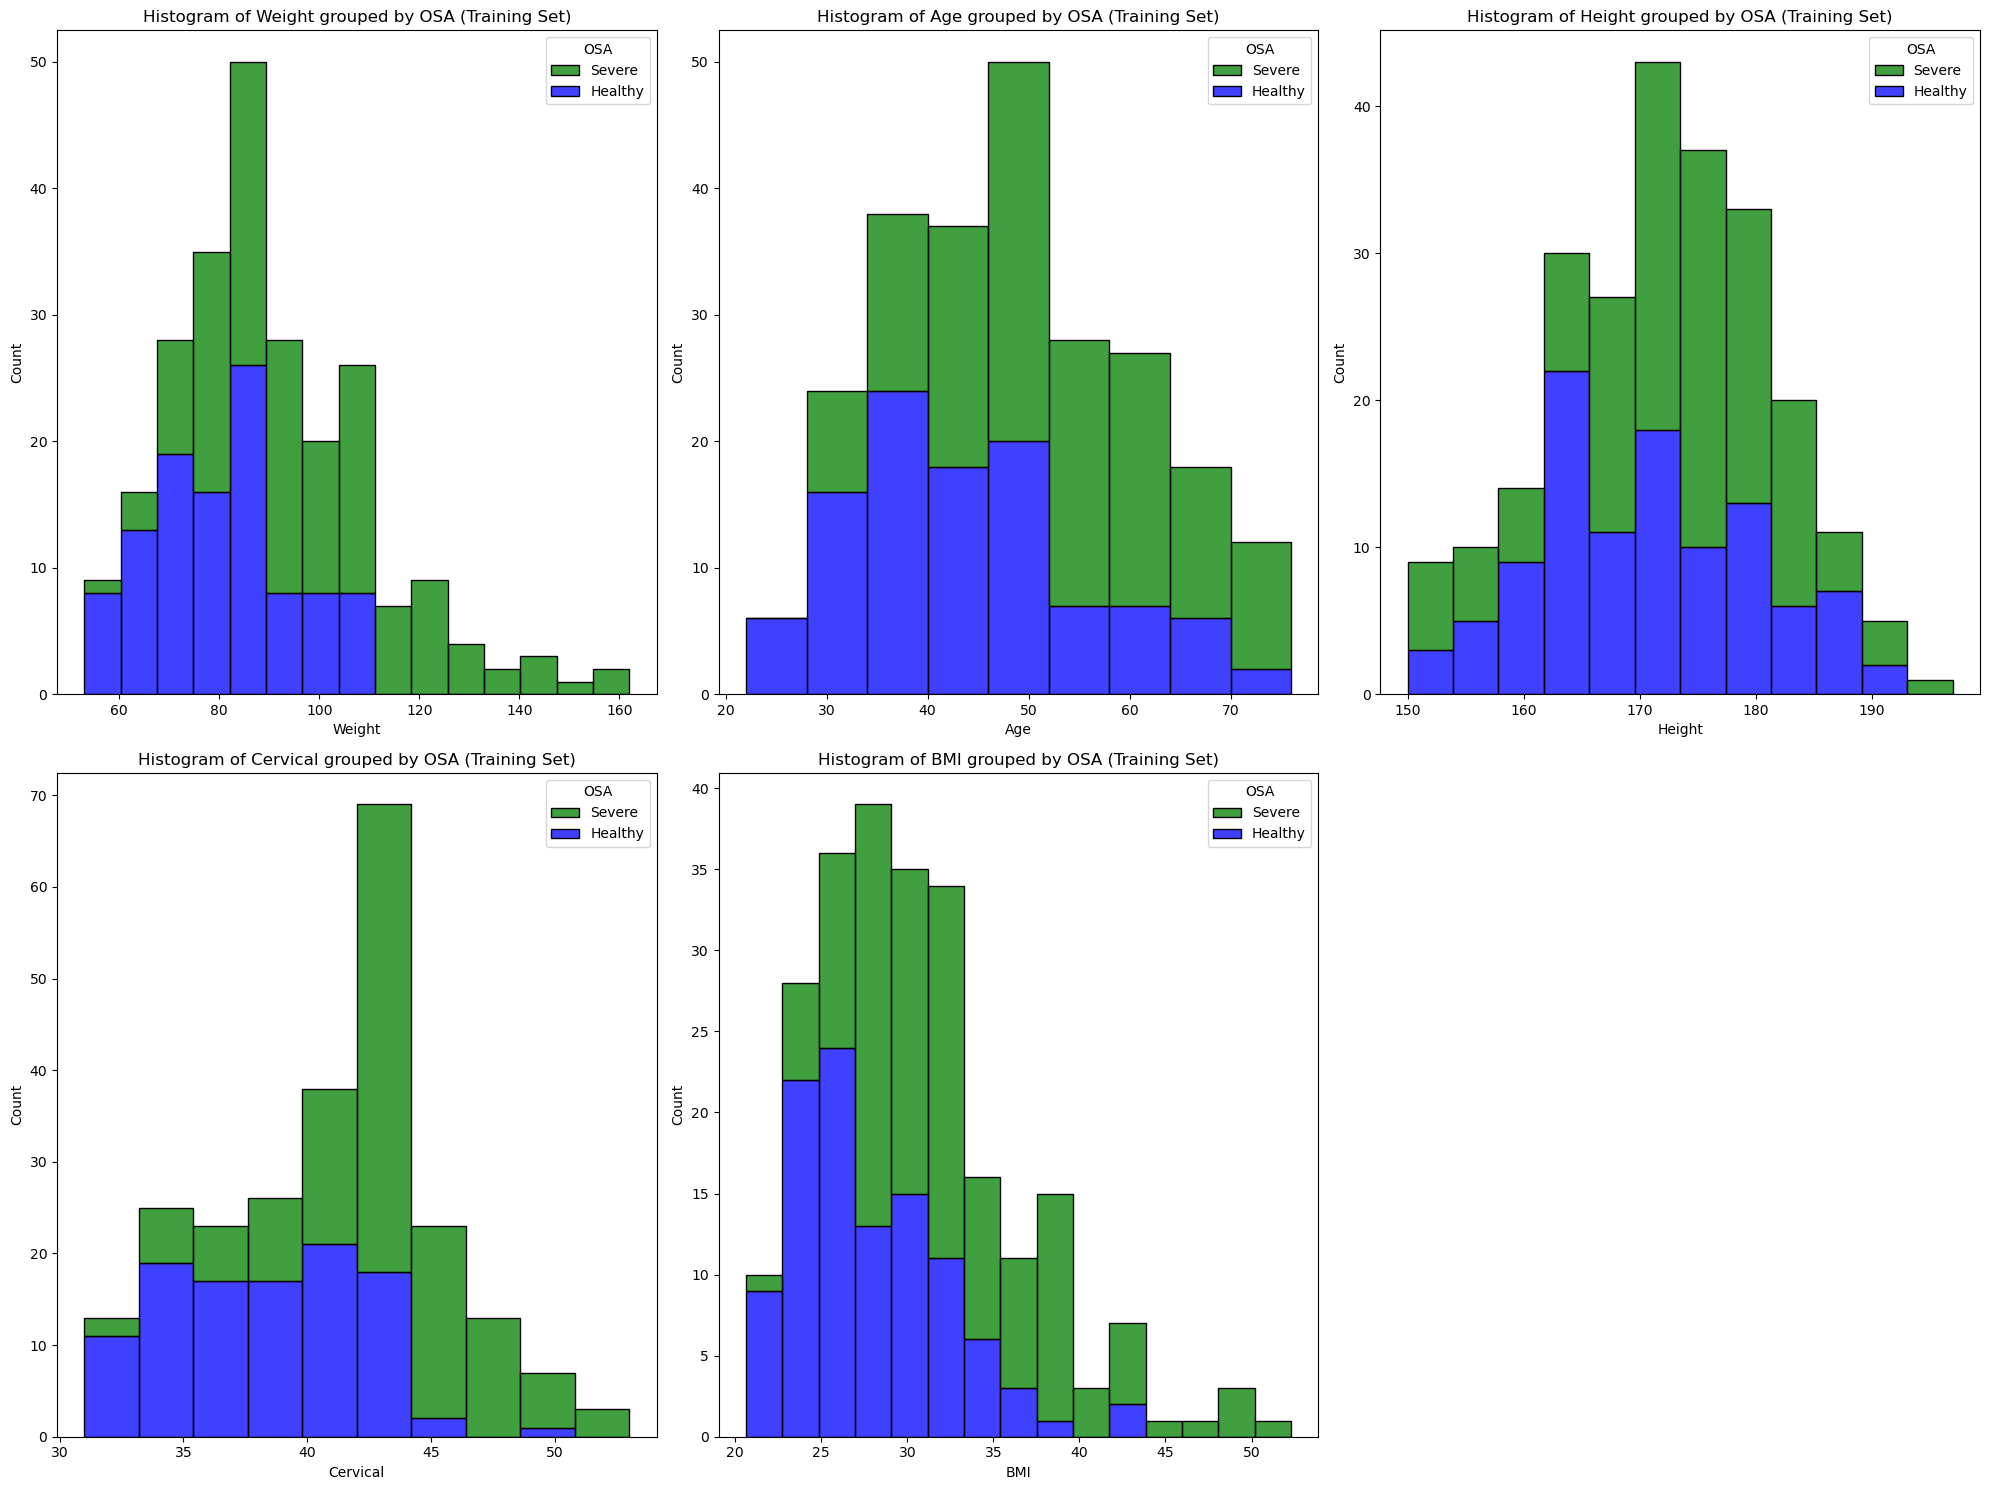

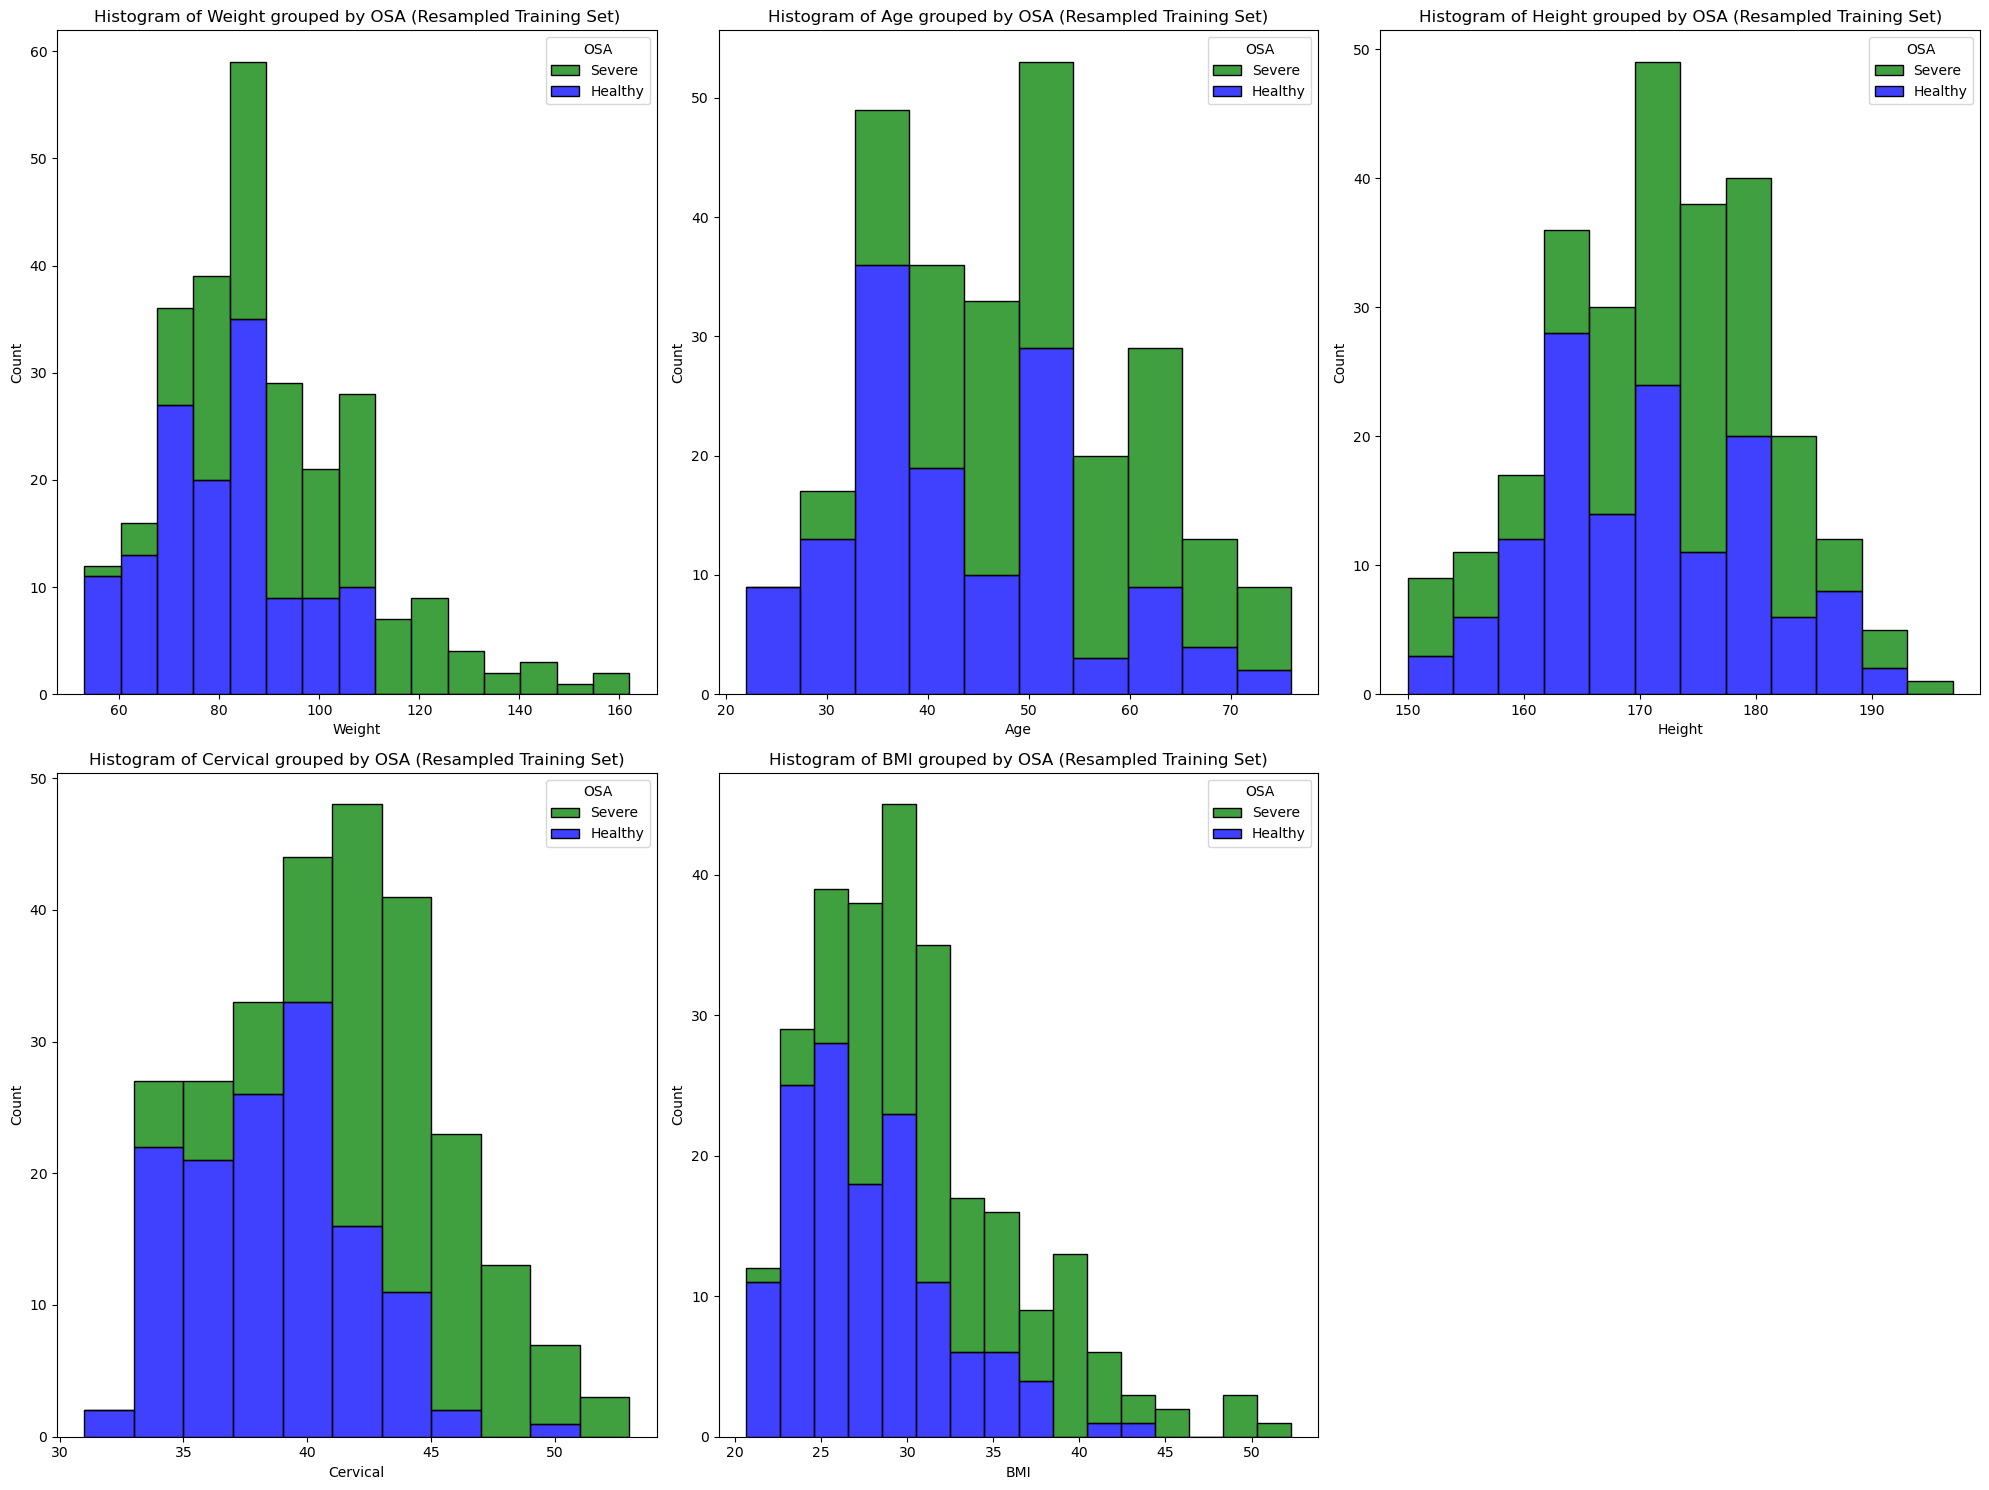

In [74]:
# Plot the histograms of each column in X_train grouped by OSA
columns_train = X_train.columns.drop(['Gender'])  # Exclude 'Gender' column
num_columns_train = len(columns_train)

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_train, 1):
    plt.subplot((num_columns_train // 3) + 1, 3, i)
    sns.histplot(data=X_train.join(y_train), x=column, hue='OSA', multiple='stack', palette={'Healthy': 'blue', 'Severe': 'green'})
    plt.title(f'Histogram of {column} grouped by OSA (Training Set)')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot the histograms of each column in X_resampled grouped by OSA
columns_resampled = X_resampled.columns.drop(['Gender'])  # Exclude 'Gender' column
num_columns_resampled = len(columns_resampled)

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_resampled, 1):
    plt.subplot((num_columns_resampled // 3) + 1, 3, i)
    sns.histplot(data=X_resampled.join(y_resampled), x=column, hue='OSA', multiple='stack', palette={'Healthy': 'blue', 'Severe': 'green'})
    plt.title(f'Histogram of {column} grouped by OSA (Resampled Training Set)')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()